## **1. Introduction**

Phân khúc khách hàng là việc tìm và lựa chọn nhóm khách hàng mà doanh nghiệp, tổ chức có khẳ năng thỏa mãn nhu cầu tốt hơn đối thủ cạnh tranh.

Mục đích: Để lựa chọn khách hàng phù hợp và phục vụ một cách tốt nhất: Tạo lợi thế cạnh tranh với các đối thủ trên thị trường, thấu hiểu khách hàng và khẳng định thương hiệu 

Cách để phân khúc khách hàng mà các doanh nghiệp hiện nay đang thực hiện: dựa vào RFM

* Recency (R): Thời gian giao dịch cuối cùng.

* Frequency (F): Tổng số lần giao dịch chi tiêu.

* Monetary value (M): Tổng só tiền giao dịch chi tiêu.


## **2. Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1buvTsZsnnQ5diefkus0sAa5Jk0qpiOOQ'
output = '/content/drive/My Drive/filename.extension'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1buvTsZsnnQ5diefkus0sAa5Jk0qpiOOQ
To: /content/drive/My Drive/filename.extension
100%|██████████| 46.1M/46.1M [00:00<00:00, 54.9MB/s]


'/content/drive/My Drive/filename.extension'

In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ex2.csv', encoding='ISO-8859-1')
print(df.head(10))

  InvoiceNo StockCode                          Description  Quantity       InvoiceDate  UnitPrice  CustomerID         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  01-12-2010 08:26       2.55     17850.0  United Kingdom
1    536365     71053                  WHITE METAL LANTERN         6  01-12-2010 08:26       3.39     17850.0  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8  01-12-2010 08:26       2.75     17850.0  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6  01-12-2010 08:26       3.39     17850.0  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6  01-12-2010 08:26       3.39     17850.0  United Kingdom
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2  01-12-2010 08:26       7.65     17850.0  United Kingdom
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6  01-12-2010 08:26       4.25     17850.0  United 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Dữ liệu gồm 8 cột và 541909 dòng. Các cột bao gồm:
* Cột InvoiceNo: số hóa đơn
* Cột StockCode: mã hàng hóa
* Cột Description: mô tả sản phẩm, các hàng hóa chủ yếu là đồ gia dụng và vật dụng trang trí nhà cửa
* Cột Quantity: số lượng sản phẩm
* Cột InvoiceDate: ngày mua hàng
* Cột UnitPrice: giá của từng sản phẩm
* Cột CustomerID: mã khách hàng
* Cột Country: quốc gia sản xuất sản phẩm (?)

In [ ]:
#Kiểm tra giá trị trong data có giá trị null hay không
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


=> Trong tập dữ liệu cột Description và CustomerID có giá trị null nên ta sẽ tiến hành loại bỏ các giá trị null này.

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Sau khi loại bỏ giá trị null thì data còn lại 406829 dòng.

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


* Cột Quantity là cột số lượng sản phẩm nên không thể có giá trị âm, nên ta sẽ tiến hành chuyển các dòng mang giá trị âm về giá trị dương.
* Cột UnitPrice là đơn giá của từng sản phẩm. Cột có min = 0, tức là có những dòng mang giá trị bằng 0, không có ý nghĩa thống kê nên ta sẽ tiến hàng loại bỏ những dòng mang giá trị bằng 0.
* Cột InvoiceDate là ngày xuất hóa đơn. Hiện tại cột đang mang dạng str nên ta sẽ chuyển về dạng datetime.
* Cột CustomerID là cột mã khách hàng. Hiện tại cột đang mang dạng float nên ta sẽ chuyển về dạng str.

In [ ]:
# Chuyển những dòng mang giá trị âm về giá trị dương
df['Quantity'] = df['Quantity'].abs()

# Loại bỏ những dòng có UnitPrice = 0
df = df.drop(df[df['UnitPrice'] == 0.0].index)

# Chuyển cột InvoiceDate về dạng datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Chuyển cột CustomerID về dạng str
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406789 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   StockCode    406789 non-null  object        
 2   Description  406789 non-null  object        
 3   Quantity     406789 non-null  int64         
 4   InvoiceDate  406789 non-null  datetime64[ns]
 5   UnitPrice    406789 non-null  float64       
 6   CustomerID   406789 non-null  object        
 7   Country      406789 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice
count,406789.000000,406789.000000
mean,13.379467,3.460811
std,247.858601,69.318561
min,1.000000,0.001000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Data còn lại 406789 dòng dữ liệu, không có giá trị null.

***Tính toán RFM***

In [ ]:
import datetime
# Lấy ngày hiện tại + 1
current_date = max(df['InvoiceDate']) + datetime.timedelta(days=1)

# Tính Total Price
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

# Group by CustomerID để tính R, F, M
df_rfm = df.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date- x.max()).days,
     'InvoiceNo':'count',
     'TotalPrice':'sum'
     }
)

#Đổi tên các cột
df_rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPrice':'MonetaryValue'}, inplace=True)

In [ ]:
# In ra data đã thêm Total Price
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [ ]:
# In ra data RFM
df_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,2,154367.20
12347,3,182,4310.00
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40


## **3. EDA**

In [ ]:
# Copy dataframe để EDA
df_eda = df.copy()

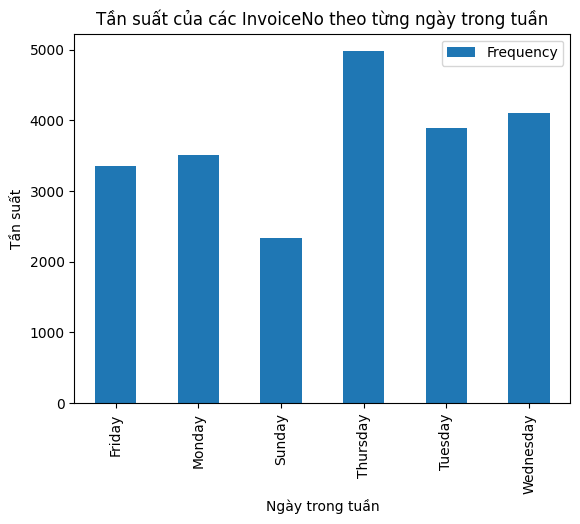

In [ ]:
#Tần suất của các InvoiceNo (tần suất mua hàng) theo từng ngày trong tuần
# Tạo cột mới chứa ngày trong tuần
df_eda['DayOfWeek'] = df_eda['InvoiceDate'].dt.day_name()

# Tạo DataFrame mới chứa số lượng InvoiceNo cho mỗi ngày trong tuần
freq_by_day = df_eda.groupby(['DayOfWeek', 'InvoiceNo'])['TotalPrice'].count().reset_index()
freq_by_day = freq_by_day.groupby('DayOfWeek')['InvoiceNo'].count().reset_index()
freq_by_day = freq_by_day.rename(columns={'InvoiceNo': 'Frequency'})

# Vẽ biểu đồ tần suất
freq_by_day.plot(x='DayOfWeek', y='Frequency', kind='bar')

# Đặt tiêu đề cho biểu đồ và các trục
plt.title('Tần suất của các InvoiceNo theo từng ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

Qua biểu đồ ta thấy được từ thứ 2 đến thứ 6, InvoiceNo không có sự chênh lệch đáng kể. Duy nhất có thứ 5, lượng hóa đơn tăng, để giải thích có thể do khách hàng có xu hướng mua sắm trước khi nghỉ ngơi vào cuối tuần.

Biểu đồ không có thứ 7, nhiều khả năng cửa hàng chủ trương đóng cửa vào thứ 7. Bởi họ đóng cửa một ngày trong khi các ngày khác có lượng bán ổn định, khách hàng sẽ có xu hướng không để tâm mua sắm nên lượng bán ngày chủ nhật sẽ giảm, sau đó mới dần ổn định trở lại ở các ngày trong tuần.

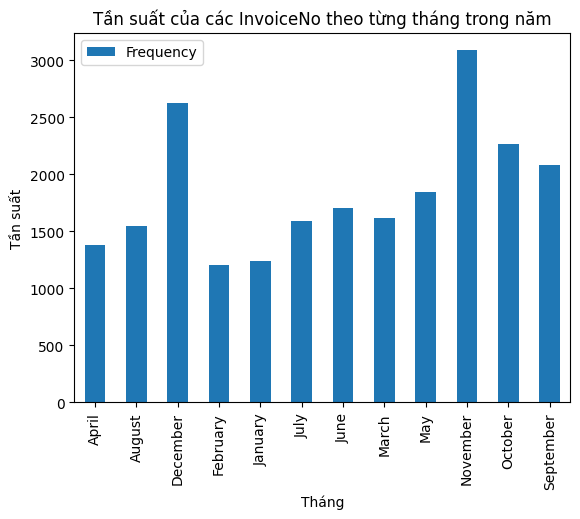

In [ ]:
#Tần suất mua hàng theo từng tháng trong năm
# Tạo cột mới chứa tháng trong năm
df_eda['Monthofyear'] = df_eda['InvoiceDate'].dt.month_name()

# Tạo DataFrame mới chứa số lượng InvoiceNo cho tháng trong năm
freq_by_month = df_eda.groupby(['Monthofyear', 'InvoiceNo'])['TotalPrice'].count().reset_index()
freq_by_month = freq_by_month.groupby('Monthofyear')['InvoiceNo'].count().reset_index()
freq_by_month = freq_by_month.rename(columns={'InvoiceNo': 'Frequency'})

# Vẽ biểu đồ tần suất
freq_by_month.plot(x='Monthofyear', y='Frequency', kind='bar')

# Đặt tiêu đề cho biểu đồ và các trục
plt.title('Tần suất của các InvoiceNo theo từng tháng trong năm')
plt.xlabel('Tháng')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

Qua biểu đồ ta thấy được có hai tháng lượng mua hàng cao đột biến, đó là tháng 12 và tháng 11. Giải thích lí do, đây là cửa hàng bán đồ gia dụng cũng như trang trí nhà cửa. Đồng thời tháng 11 có sự kiện Black Friday cũng như tháng 12 có Giáng sinh và gần đến năm mới nên lượng mua hàng sẽ cao hơn so với các tháng còn lại.

Các tháng còn lại trong năm (trừ thang 1 và tháng 2) lượng mua hàng ổn định, không có sự thay đổi nhiều.

ở tháng 1 và tháng 2, lượng mua hàng giảm do khách hàng đã mua sắm mạnh vào tháng 11 và tháng 12 trước đó, họ chưa có nhiều nhu cầu để mua sắm.

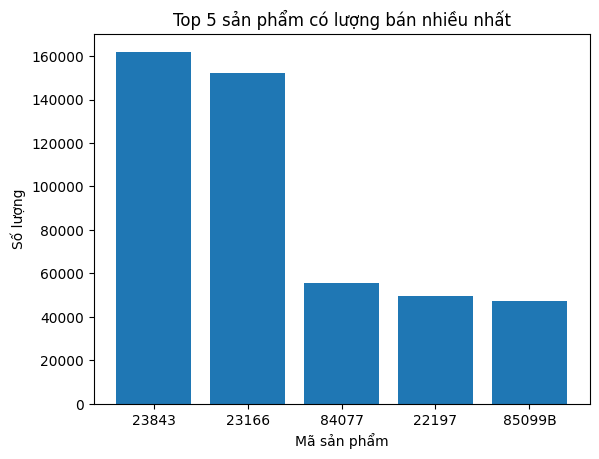

In [ ]:
# Tính toán số lượng sản phẩm bán cho mỗi StockCode
quantity_by_stockcode = df_eda.groupby(['StockCode'])['Quantity'].sum()

# Sắp xếp các StockCode theo thứ tự giảm dần của số lượng sản phẩm và lấy 5 sản phẩm có lượng bán cao nhất
quantity_by_stockcode = quantity_by_stockcode.sort_values(ascending=False).nlargest(5)

# Vẽ biểu đồ cột
plt.bar(quantity_by_stockcode.index, quantity_by_stockcode.values)

# Đặt tên cho trục x và trục y
plt.xlabel('Mã sản phẩm')
plt.ylabel('Số lượng')

# Đặt tiêu đề cho biểu đồ
plt.title('Top 5 sản phẩm có lượng bán nhiều nhất')

# Hiển thị biểu đồ
plt.show()

In [ ]:
top2 = df_eda[(df_eda['StockCode'] == '23843') | (df_eda['StockCode'] == '23166') ]
print(top2)

       InvoiceNo StockCode                     Description  Quantity InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  DayOfWeek Monthofyear
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215  2011-01-18       1.04      12346  United Kingdom    77183.60    Tuesday     January
61624    C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215  2011-01-18       1.04      12346  United Kingdom    77183.60    Tuesday     January
186770    552882     23166  MEDIUM CERAMIC TOP STORAGE JAR        96  2011-05-12       1.04      14646     Netherlands       99.84   Thursday         May
187196    552953     23166  MEDIUM CERAMIC TOP STORAGE JAR         4  2011-05-12       1.25      16745  United Kingdom        5.00   Thursday         May
187718    553005     23166  MEDIUM CERAMIC TOP STORAGE JAR         5  2011-05-12       1.25      14651  United Kingdom        6.25   Thursday         May
...          ...       ...                             ...       ...        

Qua biểu đồ, ta thấy được sản phẩm được bán chạy nhất là paper craft, tiếp đến là storage jar.

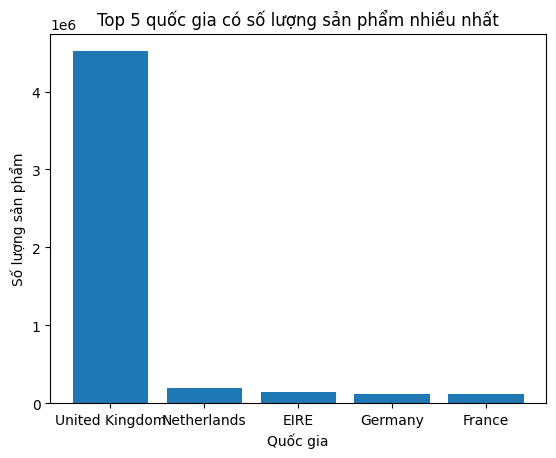

Country
United Kingdom    4517679
Netherlands        201170
EIRE               144471
Germany            121076
France             113095
Name: Quantity, dtype: int64


In [ ]:
# Tính toán số lượng sản phẩm theo quốc gia
quantity_by_country = df_eda.groupby(['Country'])['Quantity'].sum()

# Sắp xếp các sản phẩm theo thứ tự giảm dần của số lượng sản phẩm và lấy 5 sản phẩm có lượng bán cao nhất
quantity_by_country = quantity_by_country.sort_values(ascending=False).nlargest(5)

# Vẽ biểu đồ cột
plt.bar(quantity_by_country.index, quantity_by_country.values)

# Đặt tên cho trục x và trục y
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng sản phẩm')

# Đặt tiêu đề cho biểu đồ
plt.title('Top 5 quốc gia có số lượng sản phẩm nhiều nhất')

# Hiển thị biểu đồ
plt.show()
print(quantity_by_country )

Qua biểu đồ, ta thấy được phần lớn các sản phẩm được sản xuất tại Anh, cho thấy cửa hàng được đặt tại Anh.

                Recency  Frequency  MonetaryValue
Recency        1.000000  -0.207125      -0.105923
Frequency     -0.207125   1.000000       0.377689
MonetaryValue -0.105923   0.377689       1.000000


<Axes: >

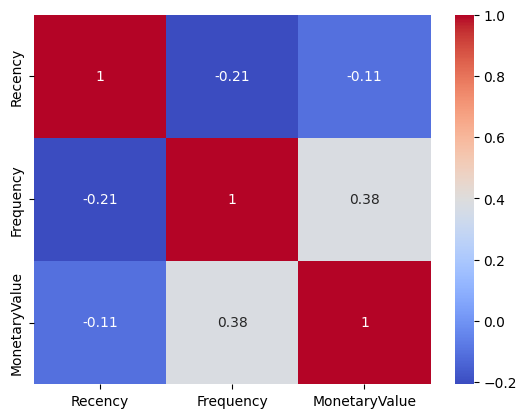

In [ ]:
# Tính toán hệ số tương quan giữa các biến RFM
corr_matrix = df_rfm.corr()

# In kết quả hệ số tương quan
print(corr_matrix)

# Vẽ biểu đồ heatmap cho ma trận hệ số tương quan
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Ma trận hệ số tương quan giữa các biến RFM cho thấy:

* Biến Recency có mối tương quan âm với biến Frequency và biến MonetaryValue, tức là khách hàng càng lâu không mua hàng thì số lần mua hàng và giá trị mua hàng trung bình của họ càng ít.
* Biến Frequency có mối tương quan dương với biến MonetaryValue, tức là khách hàng mua hàng nhiều lần thì giá trị mua hàng trung bình của họ cũng cao hơn.
Các mức độ tương quan giữa các biến đều khá thấp, trong khoảng từ -0.21 đến 0.38, cho thấy không có một mối quan hệ tuyến tính mạnh giữa các biến. Tuy nhiên, chúng ta vẫn có thể sử dụng các biến này để phân tích RFM và tìm ra những nhóm khách hàng có hành vi tương tự.

=> Có thể rút ra một số kết luận sau:
* Nhóm khách hàng không mua hàng trong thời gian gần đây, mua hàng ít lần và chi tiêu thấp có thể được xác định dựa trên mức độ cao của biến Recency và thấp của biến Frequency và biến MonetaryValue.
* Nhóm khách hàng mua hàng ít lần trong thời gian gần đây, nhưng chi tiêu cao có thể được xác định dựa trên mức độ thấp của biến Recency và cao của biến MonetaryValue.
* Nhóm khách hàng mua hàng nhiều lần và chi tiêu cao (nhóm khách hàng tiềm năng) có thể được xác định dựa trên mức độ cao của biến Frequency và biến MonetaryValue.

## **4. Pre-processing**

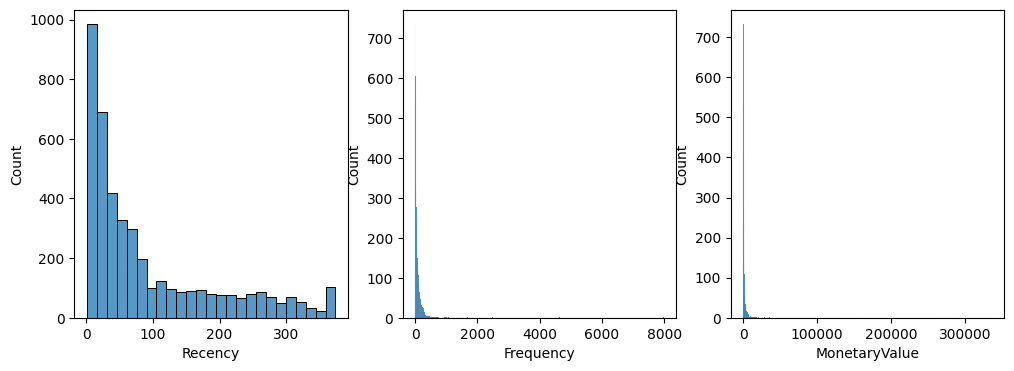

In [ ]:
# Vẽ biểu đồ displot để kiểm tra phân phối
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.histplot(df_rfm['Recency'], ax = ax[0])
sns.histplot(df_rfm['Frequency'], ax = ax[1])
sns.histplot(df_rfm['MonetaryValue'], ax = ax[2])
plt.show()

Cả ba đồ thị đều lệch phải, nếu áp dụng model thì không hiệu quả

In [ ]:
#Tìm hàm chuẩn hóa dữ liệu để đưa ba đồ thị về dạng chuẩn
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.histplot(df_rfm[x], ax=ax[0,0])
    sns.histplot(np.log(df_rfm[x]), ax=ax[0,1])
    sns.histplot(np.sqrt(df_rfm[x]), ax=ax[1,0])
    sns.histplot(stats.boxcox(df_rfm[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_rfm[x].skew().round(2))
    print(np.log(df_rfm[x]).skew().round(2))
    print(np.sqrt(df_rfm[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_rfm[x])[0]).skew().round(2))

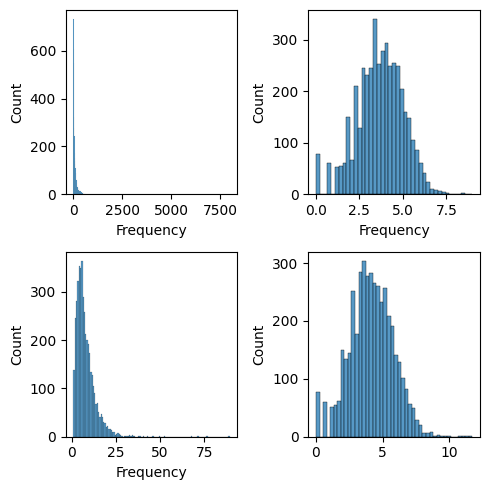

18.15
-0.24
3.2
0.0


In [ ]:
analyze_skewness('Frequency')

* Hệ số lệch của biến Frequency lấy từ dữ liệu gốc là 18.15, cho thấy biến có độ lệch rất lớn về phía bên phải và có phân phối rất không đối xứng.
* Hệ số lệch của biến Frequency sau khi được chuyển đổi bằng phép toán logarithm là -0.24, cho thấy biến có độ lệch nhỏ hơn so với dữ liệu gốc và phân phối của biến có xu hướng đối xứng hơn.
* Hệ số lệch của biến Frequency sau khi được chuyển đổi bằng phép toán căn bậc hai là 3.2, cho thấy biến có độ lệch lớn hơn so với dữ liệu gốc và phân phối của biến vẫn rất không đối xứng.
* Hệ số lệch của biến Frequency sau khi được chuyển đổi bằng phép toán Box-Cox là 0, cho thấy biến đã được chuyển đổi sao cho có phân phối gần với phân phối chuẩn

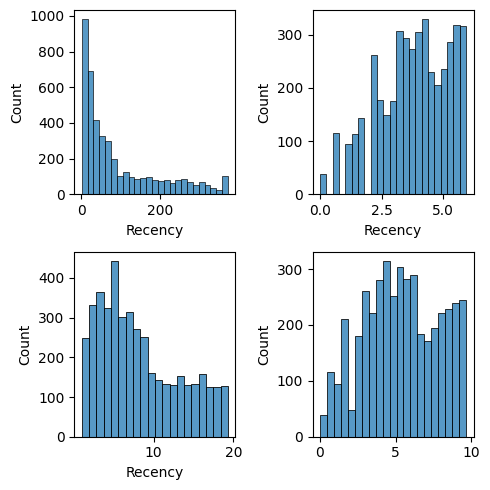

1.25
-0.45
0.6
-0.07


In [ ]:
analyze_skewness('Recency')

* Hệ số lệch của biến Recency lấy từ dữ liệu gốc là 1.25, cho thấy biến có độ lệch nhỏ về phía bên phải và có phân phối không đối xứng nhưng không quá nghiêm trọng.
* Hệ số lệch của biến Recency sau khi được chuyển đổi bằng phép toán logarithm là -0.45, cho thấy biến có độ lệch nhỏ hơn so với dữ liệu gốc và phân phối của biến có xu hướng đối xứng hơn.
* Hệ số lệch của biến Recency sau khi được chuyển đổi bằng phép toán căn bậc hai là 0.6, cho thấy biến có độ lệch nhỏ hơn so với dữ liệu gốc và phân phối của biến có xu hướng đối xứng hơn.
* Hệ số lệch của biến Recency sau khi được chuyển đổi bằng phép toán Box-Cox là -0.07, cho thấy biến đã được chuyển đổi sao cho có phân phối gần với phân phối chuẩn.

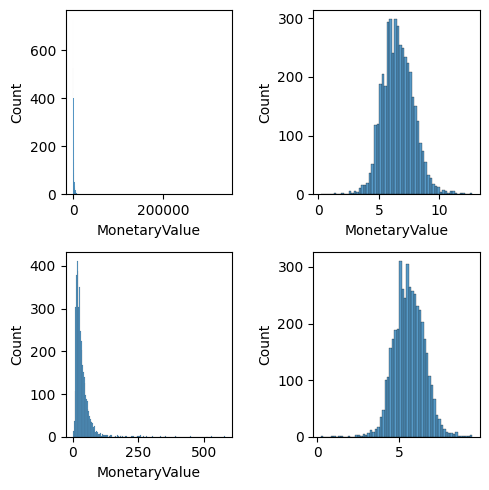

20.0
0.27
6.41
-0.02


In [ ]:
analyze_skewness('MonetaryValue')

* Hệ số lệch của biến MonetaryValue lấy từ dữ liệu gốc là 20, cho thấy biến có độ lệch rất lớn về phía bên phải và có phân phối rất không đối xứng.
* Hệ số lệch của biến MonetaryValue sau khi được chuyển đổi bằng phép toán logarithm là 0.27, cho thấy biến có độ lệch nhỏ hơn so với dữ liệu gốc và phân phối của biến có xu hướng đối xứng hơn.
* Hệ số lệch của biến MonetaryValue sau khi được chuyển đổi bằng phép toán căn bậc hai là 6.41, cho thấy biến có độ lệch lớn hơn so với dữ liệu gốc và phân phối của biến vẫn rất không đối xứng.
* Hệ số lệch của biến MonetaryValue sau khi được chuyển đổi bằng phép toán Box-Cox là -0.02, cho thấy biến đã được chuyển đổi sao cho có phân phối gần với phân phối chuẩn.

=> Từ kết quả trên, ta thấy rằng phương pháp Box-Cox là phương pháp phù hợp nhất để chuyển đổi các biến vì nó giúp làm giảm độ lệch của phân phối và đưa phân phối gần với phân phối chuẩn.

In [ ]:
#Tiến hành transform dữ liệu về dạng phân phối chuẩn
df_new = df_rfm.copy()
df_new['Recency'] = stats.boxcox(df_new['Recency'])[0]
df_new['Frequency'] = stats.boxcox(df_new['Frequency'])[0]
df_new['MonetaryValue'] = stats.boxcox(df_new['MonetaryValue'])[0]
df_new.head(10)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,9.319819,0.706966,9.037008
12347,1.196627,6.054423,6.861728
12348,6.148924,3.791591,6.269268
12349,3.722057,4.858151,6.253806
12350,9.205774,3.073803,5.056131
12352,4.824528,5.196748,6.716613
12353,8.231814,1.442309,4.028176
12354,8.524398,4.566600,5.911999
12355,8.339988,2.761111,5.292974


In [ ]:
# Tiến hành scale dữ liệu

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_new)
df_new = scaler.transform(df_new)

In [ ]:
print(df_new)

[[ 1.60653611 -2.10042338  3.68509687]
 [-1.69616134  1.15139125  1.35144863]
 [ 0.3173254  -0.22464832  0.71585495]
 ...
 [-1.18680468 -0.85128793 -1.09500864]
 [-1.55462279  2.36334546  0.82919291]
 [-0.11358001  0.39141366  0.73220371]]


## **5. Building Model**

### **5.1. K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

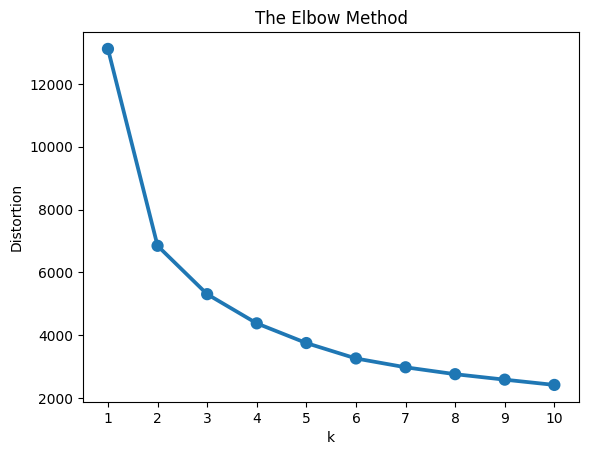

{1: 13113.000000000022, 2: 6848.987447445802, 3: 5309.734336785039, 4: 4381.5264064965695, 5: 3754.9993142440144, 6: 3264.3269664326726, 7: 2983.7564569996784, 8: 2764.10588307541, 9: 2590.104959915848, 10: 2422.6135537110686}


In [ ]:
# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

# Khởi tạo một dictionary để lưu giá trị distortion tương ứng với mỗi số lượng cụm k
distortions_kmeans = {}

# Áp dụng phân nhóm dữ liệu với số lượng cụm k từ 1 đến 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_new)
    distortions_kmeans[k] = kmeans.inertia_ 

# Vẽ biểu đồ distortion theo số lượng cụm k  
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Distortion')
sns.pointplot(x=list(distortions_kmeans.keys()), y=list(distortions_kmeans.values()))
plt.show()

# In ra giá trị distortion tương ứng với mỗi số lượng cụm k
print(distortions_kmeans)

Giá trị distortion giảm khi số lượng cụm k tăng lên, điều này cho thấy việc phân nhóm dữ liệu thành nhiều cụm hơn giúp giảm độ méo và tăng độ tách biệt giữa các cụm.

Sự giảm đáng kể giá trị distortion từ k=1 đến k=2 cho thấy việc phân nhóm dữ liệu thành hai cụm giúp tách biệt dữ liệu tốt hơn so với chỉ có một cụm.

Tuy nhiên, sự giảm đáng kể tiếp theo của giá trị distortion từ k=2 đến k=3 và k=4 cho thấy việc phân nhóm dữ liệu thành ba và bốn cụm không cải thiện đáng kể độ tách biệt giữa các cụm.

Sự giảm đáng kể của giá trị distortion giảm khi số lượng cụm vượt qua 4 cho thấy việc phân nhóm dữ liệu thành nhiều hơn bốn cụm không cải thiện đáng kể độ tách biệt giữa các cụm.

=> Dựa trên các nhận xét trên, ta có thể chọn số lượng cụm tối ưu cho phân nhóm dữ liệu là 3 cụm.

In [ ]:
model_kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(df_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df_rfm['Cluster'] = model_kmeans.labels_
df_rfm.head() 

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,326,2,154367.20,0
12347,3,182,4310.00,1
12348,76,31,1797.24,0
12349,19,73,1757.55,1
12350,311,17,334.40,2


In [ ]:
df_rfm.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,65.31,51.66,1056.25
1,19.51,242.38,5982.42
2,194.97,15.25,287.24


Dựa trên bảng đánh giá, ta có thể đưa ra một số nhận định về các cụm được phân chia bằng phương pháp K-means Clustering như sau:
* Cluster 1 (Recency rất thấp, Frequency cao, MonetaryValue rất cao): đây có thể là những khách hàng thường xuyên mua hàng, chi tiêu nhiều tiền, và mới đây vừa mua hàng gần đây.

* Cluster 0 (Recency trung bình, Frequency trung bình, MonetaryValue trung bình): đây có thể là những khách hàng trung thành, mua hàng thường xuyên, và chi tiêu ở mức trung bình.

* Cluster 2 (Recency cao, Frequency thấp, MonetaryValue thấp): đây có thể là những khách hàng ít mua hàng, chi tiêu ít, và đã mua hàng cách đây khá lâu.

=> Một số giải pháp nhắm mục tiêu khách hàng hiệu quả:

**Cluster 1:**
* Chiến lược giữ chân khách hàng: Do đây là những khách hàng thường xuyên mua hàng, chi tiêu nhiều tiền và mới đây vừa mua hàng gần đây, doanh nghiệp có thể tập trung vào việc giữ chân khách hàng này bằng cách cung cấp dịch vụ chất lượng cao, giải quyết các vấn đề của khách hàng nhanh chóng và hiệu quả, và tăng cường quan hệ khách hàng.

* Chiến lược tăng doanh số bán hàng: Do đây là khách hàng thường xuyên mua hàng và chi tiêu nhiều tiền, doanh nghiệp có thể đưa ra các chương trình khuyến mãi, giảm giá và ưu đãi hấp dẫn để tăng doanh số bán hàng và lợi nhuận.

**Cluster 0:**
* Chiến lược tăng tính trung thành của khách hàng: Do đây là những khách hàng trung thành, mua hàng thường xuyên và chi tiêu ở mức trung bình, doanh nghiệp có thể tăng tính trung thành của khách hàng bằng cách tăng cường quan hệ khách hàng, cung cấp các sản phẩm và dịch vụ chất lượng cao và đáp ứng nhu cầu của khách hàng.

* Chiến lược tăng doanh số bán hàng: Do đây là những khách hàng mua hàng thường xuyên, doanh nghiệp có thể tăng doanh số bán hàng bằng cách đưa ra các chương trình khuyến mãi, giảm giá và ưu đãi hấp dẫn theo từng đợt để thu hút khách hàng mua hàng thêm.

**Cluster 2:**
* Chiến lược tìm kiếm khách hàng mới: Do đây là những khách hàng ít mua hàng, chi tiêu ít và đã mua hàng cách đây khá lâu, doanh nghiệp có thể tìm kiếm khách hàng mới và tập trung vào việc thu hút và giữ chân khách hàng mới bằng cách cung cấp các sản phẩm và dịch vụ chất lượng cao, đáp ứng nhu cầu của khách hàng.

* Chiến lược tăng doanh số bán hàng: Do đây là những khách hàng ít mua hàng, doanh nghiệp có thể tăng doanh số bán hàng bằng cách đưa ra các chương trình khuyến mãi, giảm giá và ưu đãi hấp dẫn để thu hút khách hàng mua hàng thêm.

### **5.2. Hierarchical Clustering**

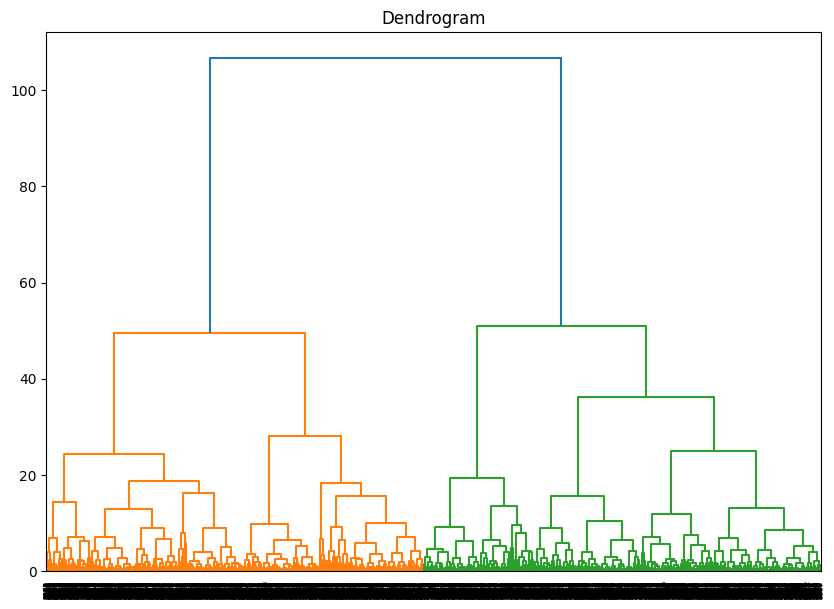

Silhouette score for 2 clusters: 0.3512744288787062
Silhouette score for 3 clusters: 0.2514903825877441
Silhouette score for 4 clusters: 0.24437549513960227
Silhouette score for 5 clusters: 0.23963132919854302
Silhouette score for 6 clusters: 0.1954610876902972
Silhouette score for 7 clusters: 0.18508341298943473
Silhouette score for 8 clusters: 0.19130540980692892
Silhouette score for 9 clusters: 0.18002504414449552
Silhouette score for 10 clusters: 0.18132103670687533


In [ ]:
# Chọn số cụm bằng Dendrogram và Silhouette score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Tính toán ma trận liên kết và vẽ Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(linkage(df_new, method='ward'))
plt.show()

# Tính silhouette score với các số lượng cụm khác nhau
for n_clusters in range(2, 11):
    model_hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model_hc.fit_predict(df_new)
    silhouette_avg = silhouette_score(df_new, labels)
    print("Silhouette score for {} clusters: {}".format(n_clusters, silhouette_avg))

Dựa trên kết quả silhouette score cho từng số lượng cụm, ta có thể chọn số lượng cụm tối ưu bằng cách chọn số lượng cụm tương ứng với silhouette score lớn nhất. Trong trường hợp này, silhouette score lớn nhất là 0.351 cho số lượng cụm là 2.

In [ ]:
model_hc= AgglomerativeClustering(n_clusters=2)
model_hc.fit(df_new)

AgglomerativeClustering()

In [ ]:
df_rfm['Cluster'] = model_hc.labels_
df_rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,326,2,154367.20,1
12347,3,182,4310.00,0
12348,76,31,1797.24,0
12349,19,73,1757.55,0
12350,311,17,334.40,1


In [ ]:
df_rfm.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,47.84,160.19,3603.80
1,139.69,22.44,679.17


Ta có thể đưa ra một số nhận xét như sau:

* Cụm 0 có giá trị Recency, Frequency và MonetaryValue trung bình cao hơn rất nhiều so với cụm 1. Điều này có thể cho thấy các khách hàng trong cụm 0 là những khách hàng thường xuyên mua hàng với số lần mua và giá trị đơn hàng trung bình cao hơn.
* Cụm 1 có giá trị Recency trung bình cao hơn so với cụm 0, cho thấy các khách hàng trong cụm 1 không mua hàng thường xuyên nhưng gần đây vẫn có hoạt động mua hàng.

=> Một số giải pháp nhắm mục tiêu khách hàng hiệu quả:

**Cụm 0:**
* Chiến lược tập trung: Do đây là nhóm khách hàng thường xuyên mua hàng với số lần mua và giá trị đơn hàng trung bình cao hơn, doanh nghiệp có thể tập trung vào việc phục vụ và giữ chân khách hàng này bằng cách cung cấp dịch vụ chất lượng cao, giải quyết các vấn đề của khách hàng nhanh chóng và hiệu quả, và tăng cường quan hệ khách hàng.

* Chiến lược đa dạng hóa sản phẩm hoặc dịch vụ: Do khách hàng trong cụm 0 mua hàng thường xuyên và giá trị đơn hàng trung bình cao hơn, doanh nghiệp có thể đa dạng hóa sản phẩm hoặc dịch vụ để đáp ứng nhu cầu và mong muốn của khách hàng này, từ đó tăng doanh số bán hàng và lợi nhuận.

**Cụm 1:**

* Chiến lược khuyến khích mua hàng: Do đây là nhóm khách hàng không mua hàng thường xuyên, doanh nghiệp có thể tập trung vào việc khuyến khích khách hàng mua hàng thường xuyên hơn bằng cách cung cấp các chương trình khuyến mãi, giảm giá và ưu đãi hấp dẫn. Đồng thời, doanh nghiệp cũng nên đảm bảo rằng sản phẩm hoặc dịch vụ được cung cấp đáp ứng nhu cầu và mong muốn của khách hàng.

* Chiến lược tìm kiếm khách hàng mới: Do khách hàng trong cụm 1 có giá trị Recency trung bình cao hơn so với cụm 0, doanh nghiệp có thể tìm kiếm khách hàng mới và tập trung vào việc thu hút và giữ chân khách hàng mới bằng cách cung cấp các sản phẩm và dịch vụ chất lượng cao, giải quyết các vấn đề của khách hàng nhanh chóng và hiệu quả, và tăng cường quan hệ khách hàng.